In [66]:
%matplotlib notebook
import numpy 
from omuse.units import units
from omuse.community.dales.interface import Dales
import matplotlib
import matplotlib.pyplot as plt
import os
import random
from matplotlib.widgets import CheckButtons

RectilinearGrid (96) (E12, QT, THL, U, V, z)


<IPython.core.display.Javascript object>


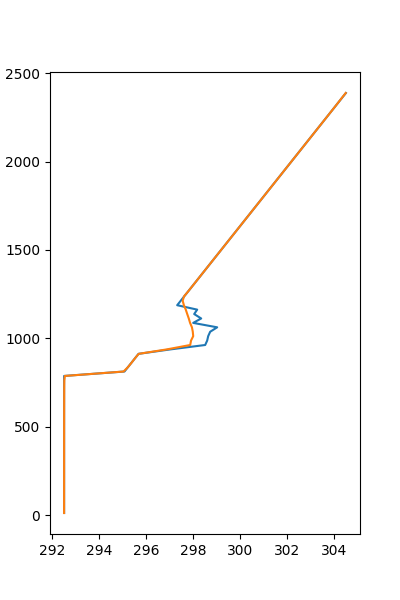

In [67]:
#Create dales object
d=Dales(redirection='none')  

# alternative for redirecting Dales output to files
#d=Dales(redirection='file', redirect_stdout_file='dales.out', redirect_stderr_file='dales.err')

# Set parameters
d.parameters_DOMAIN.itot = 32  # number of grid cells in x
d.parameters_DOMAIN.jtot = 32  # number of grid cells in y
d.parameters_DOMAIN.xsize = 6400 | units.m
d.parameters_DOMAIN.ysize = 6400 | units.m

d.parameters_RUN.ladaptive = True

# Select advection schemes
d.parameters_DYNAMICS.iadv_mom = 62
d.parameters_DYNAMICS.iadv_thl = 52
d.parameters_DYNAMICS.iadv_qt = 52
d.parameters_DYNAMICS.iadv_tke = 52
d.parameters_DYNAMICS.iadv_sv = [52,52]

# d.parameters_NAMMICROPHYSICS.imicro=6

#Define initial_profile_grid from dales   
print d.initial_profile_grid

# Make a selection between: E12, QT, THL, U, V
choice=d.initial_profile_grid.THL

# Initial plot of the data set
fig=plt.figure(1, figsize=(4, 6)) 
plt.clf()
plt.plot(choice.number,d.initial_profile_grid.z.value_in(units.m))
plt.xlabel('data') 

# Apply changes by click on plot
def get_new_value(event):
    print('click', event)
    if event.xdata and event.ydata:
        data_new=event.xdata
        data_coord=event.ydata
    
    # Replace data value in the initial array
    def find_nearest(array, value):
        array = numpy.asarray(array)
        idx = (numpy.abs(array - value)).argmin()
        return array[idx]                  
    #search for nearest Z
    data_z_coord=d.initial_profile_grid.z.value_in(units.m)           
    x=find_nearest(data_z_coord,data_coord)
    print(data_z_coord,data_coord)
    #replace value            
    for i in range(len(d.initial_profile_grid.z)):
        if (d.initial_profile_grid.z.value_in(units.m)[i]) == x:
            print(choice[i],data_new)
            choice[i]=data_new | choice.unit
            
    # Plot new results
    plt.clf()
    plt.plot(choice.number,d.initial_profile_grid.z.value_in(units.m))
        
#Initializing loop with changing values in data set
cid = fig.canvas.mpl_connect('button_press_event', get_new_value)



In [68]:
d.evolve_model(1 | units.s)

quantity<0.432971889008 s>

In [69]:
d.set_nudge_time_THL(600 | units.s)
time = 60 | units.s

In [73]:
for i in range (10):
    d.nudge.THL = choice
    time += 60 | units.s
    print time
    d.evolve_model(time)

    plt.clf()
    plt.plot(choice.number,d.initial_profile_grid.z.value_in(units.m))
    plt.plot(d.profile_grid.THL.number,d.initial_profile_grid.z.value_in(units.m))
    plt.gcf().show()

840 s
900 s
960 s
1020 s
1080 s
1140 s
1200 s
1260 s
1320 s
1380 s


In [55]:
time = 1000 | units.s